In [4]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
# Splitting the data between train and test
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [6]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


## Plotting the Images

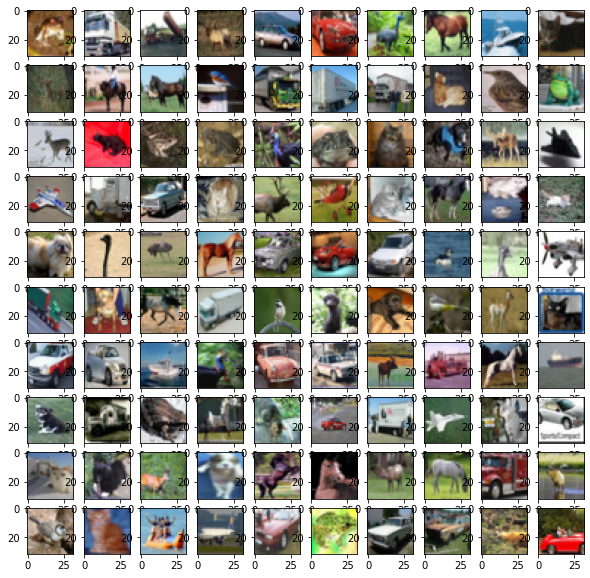

In [7]:
fig=plt.figure(figsize=(10,10))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1)
    ax.imshow(x_train[i])    

## Reshaping

In [8]:
x_train=x_train.reshape(50000,3072)
x_test=x_test.reshape(10000,3072)

## Applying PCA

In [9]:
pca=PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
pca.explained_variance_.shape

(3072,)

## Finding the number of features that contribute

In [11]:
k=0
den=sum(pca.explained_variance_)
num=0
while num/den<0.98:
    num+=pca.explained_variance_[k]
    k+=1
print('Number of features consisting of 98% variance:',k)

Number of features consisting of 98% variance: 444


In [12]:
pca=PCA(n_components=k)
x_train_transformed=pca.fit_transform(x_train)
x_test_transformed=pca.transform(x_test)
print(x_test_transformed.shape)
print(x_test_transformed.shape)

(10000, 444)
(10000, 444)


## Save PCA object

In [13]:
import pickle
pickle.dump(pca, open("pca.pkl","wb"))

In [14]:
print(x_test[0])
pca_reload = pickle.load(open("pca.pkl",'rb'))
test_image = pca_reload.transform(x_test[0].reshape(1,-1))
test_image

[158 112  49 ...  21  67 110]


array([[-8.87315995e+02,  2.31138724e+02,  3.19248708e+02,
         8.06868795e+02, -4.89151167e+02,  4.23166428e+02,
        -1.73612696e+01,  4.08890122e+01, -1.20403122e+02,
        -4.65620055e+01, -2.68710059e+02,  3.91188573e+02,
         1.36874053e+02,  4.39572561e+01, -3.11953178e+02,
         7.78030359e+00,  2.62539215e+02,  6.38181733e+02,
        -1.01400796e+03, -3.48613572e+02, -2.58359976e+02,
        -1.22250768e+02, -3.23358063e+02, -4.53716167e+01,
         6.14855086e+02,  3.33839332e+02,  9.05817270e+01,
         2.03188800e+01, -1.57181733e+02,  2.03727641e+02,
         1.00975130e+01, -1.41602459e+02, -8.39521794e+01,
         2.50083612e+01, -4.54775998e+02, -2.32251452e+02,
        -3.49298659e+02, -2.06491251e+02, -5.28869026e+01,
        -2.13295032e+02,  9.94385536e+00, -2.24206414e+01,
         4.08569665e+01,  5.39066050e+01, -1.71688086e+02,
         8.14641490e+01, -1.57012726e+02,  2.31978783e+01,
         2.78149686e+01, -3.46794975e+01, -1.19798880e+0

In [15]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_train_transformed,y_train,test_size=0.30,random_state=123)

In [16]:
x_test1[0]

array([-3.27448247e+02, -7.29414586e+02, -8.22454967e+02, -1.48401190e+02,
       -4.09638928e+02, -6.76438618e+02,  9.69693313e+02,  2.53888017e+02,
       -5.71523319e+02, -9.26326519e+01, -3.03310705e+02,  1.95371876e+02,
        1.41695057e+02,  1.52997842e+02, -4.93867166e+01, -4.10670408e+02,
       -4.83671077e+01, -1.78058497e+02,  6.04168562e+02,  8.86014615e+01,
        1.64388938e+02, -9.85764521e+00,  2.45170192e+02, -4.60325227e+00,
       -3.17424558e+02, -1.93708495e+02,  3.08501871e+02,  3.56661921e+01,
        8.41789831e+01, -8.04434724e+01, -1.87833476e+02, -1.61608365e+01,
        1.61469860e+02,  5.15248051e+00, -1.51329716e+02,  3.84781767e+01,
        2.36295502e+02,  8.97480477e+01, -6.35184460e+01, -2.57801997e+01,
        1.08793647e+02, -1.03481866e+02,  3.40533562e+01, -1.78147283e+02,
        1.20887189e+02, -4.58146851e+01, -4.72616370e+01,  1.09090745e+02,
        4.68912750e+01, -3.05321000e+01, -5.17453917e+01,  1.01539234e+02,
       -5.66520856e+01, -

In [17]:
SVM=svm.SVC()
SVM.fit(x_train1,y_train1)
svm_score=SVM.score(x_test1,y_test1)

KNN=KNeighborsClassifier()
KNN.fit(x_train1,y_train1)
knn_score=KNN.score(x_test1,y_test1)

tree=DecisionTreeClassifier()
tree.fit(x_train1,y_train1)
tree_score=tree.score(x_test1,y_test1)

forest=RandomForestClassifier()
forest.fit(x_train1,y_train1)
forest_score=forest.score(x_test1,y_test1)


print('SVM:',svm_score)
print('KNN:',knn_score)
print('Decision Tree:', tree_score)
print('Random Forest:', forest_score)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


SVM: 0.528
KNN: 0.333
Decision Tree: 0.2482
Random Forest: 0.39353333333333335


In [18]:
print('SVM:',svm_score)
print('KNN:',knn_score)
print('Decision Tree:', tree_score)
print('Random Forest:', forest_score)

SVM: 0.528
KNN: 0.333
Decision Tree: 0.2482
Random Forest: 0.39353333333333335


## Saving the model with best accuracy

In [19]:
import pickle
pickle.dump(SVM, open('model.sav', 'wb'))

In [20]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
loaded_model = pickle.load(open('model.sav', 'rb'))
prediction=loaded_model.predict(test_image)
print(classes[prediction[0]])

cat


In [21]:
y_pred=SVM.predict(x_test_transformed)
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
predictions=[]
for i in y_pred:
    predictions.append(classes[i])

In [22]:
predictions=np.array(predictions)
predictions

array(['cat', 'ship', 'ship', ..., 'dog', 'dog', 'horse'], dtype='<U10')

In [23]:
df=pd.DataFrame(predictions)
df

,0
0,cat
1,ship
2,ship
3,airplane
4,deer
...,...
9995,ship
9996,frog
9997,dog
9998,dog
